<a href="https://colab.research.google.com/github/lucia1970-student/Autism_Repo/blob/main/SNN_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet

/content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet


In [54]:
#Autism prognosis using voice biomarkers.

#Dataset from study below.  Available on request.
# https://www.nature.com/articles/s41398-023-02554-8#Fig2

#I am proposing ALL characteristics of voice biomarkers (19) and 2 target
#classes (CTRL (no TD) and ASD) in order to classify data.
#The purpose of this iteration is to validate the study results.
#The validation steps are detailed below:

#1. Selecting ALL characteristicss and 2 classes ('ASD' and 'TD') as per study's
#identified characteristics and classes.  The 19 characteristics have been ranked
# with Recursive Feature Elimination (RFE).  No characteristics were eliminated at
# this stage.

#2. Applied feature rankings and applied  dimension reduction with RFE and PCA.
# PCA components = 4 @ 99% coverage.  84 rows out 108, no rows were eliminated.

#3. Split dataset into train/test (70%/30%) and apply a Simple Neural Network
#with ROC scoring including optimal threshold.

#4 Plot the ROC_AUC curve with optimal threshold.

#5.Plot confusion matrix displaying

import numpy as np

#Load data.
import pandas as pd
df=pd.read_csv("voice_data.csv")
data=df.copy()
display.max_columns = None
display.nax_rows = None
#display(data)
#display(data.columns)

a = np.count_nonzero(data.Group == 'TD')
b = td_count = np.count_nonzero(data.Group == 'IC')
c = td_count = np.count_nonzero(data.Group == 'SLI')
d = np.count_nonzero(data.Group == 'ASD')
z = a + b + c
print('CTRL count (No TD): ', z-24)
print('ASD count: ', d)
#display(data.value_counts())
#data.Group.unique()


CTRL count (No TD):  46
ASD count:  38


In [55]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import pandas as pd

ss = StandardScaler()
lb = LabelBinarizer()

# Create a copy of the DataFrame before filtering and modifying it
df_filtered = df[df['Group'] != 'TD'].copy()

# Modified line to fix the error: using isin instead of '|'
ctrl_group = df_filtered.loc[df_filtered['Group'].isin(['SLI', 'IC'])] # Use isin to check for membership in a list

ctrl_group.loc[:, 'Group'] = 'CTRL'
asd_group = df_filtered.loc[(df_filtered['Group'] == 'ASD')]
y = pd.concat([ctrl_group, asd_group]).Group
y = lb.fit_transform(y).ravel()

X = df_filtered.loc[:, ['avg_F1', 'shimmer', 'jitter_s', 'mean_hnr']]
X = ss.fit_transform(X)

X,y


(array([[-0.36394851,  0.27568823,  0.37323209,  0.02947773],
        [-1.19035528,  0.3345345 , -0.49527867,  0.67542447],
        [ 0.39974309, -0.66961117, -0.27642553,  0.95533472],
        [-1.26668861,  1.59602889, -1.18798763, -0.87484771],
        [-0.6381034 ,  1.09725576,  0.30135185, -1.02556861],
        [-0.55173565,  0.17480043, -0.62107013,  0.58929824],
        [-0.78037725,  1.18223517, -0.74552725, -0.61646901],
        [-1.03123793,  0.67623796, -1.61492849,  0.26632487],
        [-0.35463083,  0.95144609, -0.22975611, -0.59493745],
        [-0.39441017,  1.85102946, -0.26710517, -0.93944238],
        [-1.86839588,  0.52931139, -0.49261682,  0.56776668],
        [-0.63057758,  2.00640313, -0.53342044, -1.71457847],
        [-1.43512364,  1.7444371 , -1.84093497, -0.48727966],
        [-1.14699222,  1.18529335, -0.883616  , -0.46574811],
        [-0.94487018,  0.75657469, -1.00713721,  0.11560396],
        [-0.35463083, -0.59340286, -0.33726704,  0.82614537],
        

In [56]:
import numpy as np
from sklearn.decomposition import PCA

pca.n_components = 4
X = pca.fit_transform(X)
print("Explained Variance Ratio: ", sum(pca.explained_variance_ratio_))
display(len(X))

Explained Variance Ratio:  0.9999999999999999


84

Epoch [5/100], Loss: 0.6774
Epoch [10/100], Loss: 0.6728
Epoch [15/100], Loss: 0.6683
Epoch [20/100], Loss: 0.6639
Epoch [25/100], Loss: 0.6594
Epoch [30/100], Loss: 0.6549
Epoch [35/100], Loss: 0.6503
Epoch [40/100], Loss: 0.6457
Epoch [45/100], Loss: 0.6410
Epoch [50/100], Loss: 0.6362
Epoch [55/100], Loss: 0.6314
Epoch [60/100], Loss: 0.6264
Epoch [65/100], Loss: 0.6213
Epoch [70/100], Loss: 0.6162
Epoch [75/100], Loss: 0.6110
Epoch [80/100], Loss: 0.6057
Epoch [85/100], Loss: 0.6005
Epoch [90/100], Loss: 0.5952
Epoch [95/100], Loss: 0.5898
Epoch [100/100], Loss: 0.5845
Optimal Threshold (Youden's J-Index): 0.5269

Threshold: 0.53
TP: 11, FP: 1, FN: 2, TN: 12


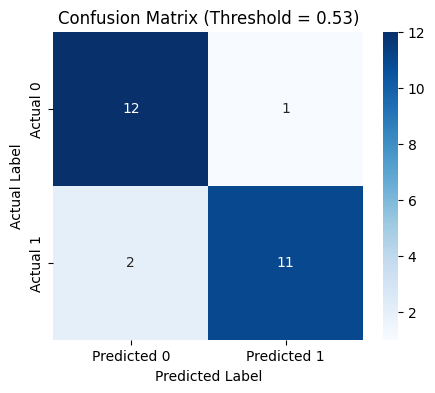

<function matplotlib.pyplot.show(close=None, block=None)>

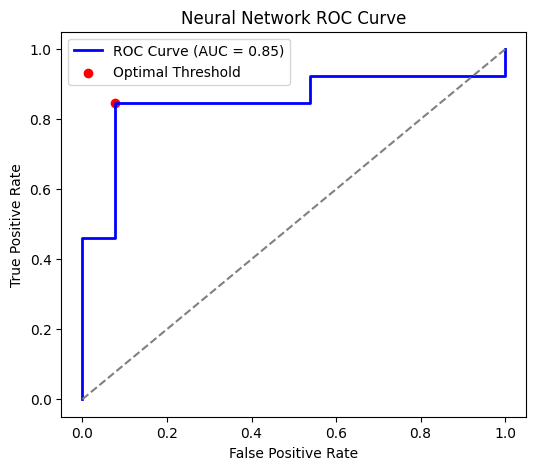

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# ---- Define Neural Network ---- #
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)  # Probability output

# Initialize Model
model = SimpleNN(input_size=X_train.shape[1])  # Use the correct input size based on the X data
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---- Train the Model ---- #
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# ---- Evaluate & Compute Metrics ---- #
model.eval()
with torch.no_grad():
    y_scores = model(X_test_tensor).numpy().flatten()  # Predicted probabilities
    y_true = y_test_tensor.numpy().flatten()

# ---- Compute ROC & Find Optimal Threshold ---- #
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Find Best Threshold using Youden’s J-Index (maximizing (TPR - FPR))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold (Youden's J-Index): {optimal_threshold:.4f}")

# ---- Compare Confusion Matrices for Different Thresholds ---- #
thresholds_to_test = [optimal_threshold]  # Test different thresholds

for threshold in thresholds_to_test:
    y_preds = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_preds).ravel()

    print(f"\nThreshold: {threshold:.2f}")
    print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")

    plt.figure(figsize=(5,4))
    sns.heatmap([[tn, fp], [fn, tp]], annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix (Threshold = {threshold:.2f})")
    plt.show()

# ---- Plot ROC Curve ---- #
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label="Optimal Threshold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Neural Network ROC Curve")
plt.legend()
plt.show